### This is a notebook for EDA on CHR Analytic Datasets & Training of Random Forest Model

In [2]:
# Import all the necessary packages
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
DATA_PATH = os.getcwd()
dataset_name = "analytic_data2023_0.csv"
FULL_PATH = os.path.join(DATA_PATH, 'data', "CHR Analytic Datasets", dataset_name)
data = pd.read_csv(FULL_PATH, low_memory=False)
data = data[1:]
data.head(10)

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature Death raw value,Premature Death numerator,Premature Death denominator,...,% Female raw value,% Female numerator,% Female denominator,% Female CI low,% Female CI high,% Rural raw value,% Rural numerator,% Rural denominator,% Rural CI low,% Rural CI high
1,00,000,00000,US,United States,2023,NaN,7281.9355638,4125218,917267406,...,0.5047067187,167509003,331893745,NaN,NaN,0.193,NaN,NaN,NaN,NaN
2,01,000,01000,AL,Alabama,2023,NaN,10350.071456,88086,13668498,...,0.5142542169,2591778,5039877,NaN,NaN,0.409631829,1957932,4779736,NaN,NaN
3,01,001,01001,AL,Autauga County,2023,1,8027.3947267,836,156081,...,0.513782892,30362,59095,NaN,NaN,0.4200216232,22921,54571,NaN,NaN
4,01,003,01003,AL,Baldwin County,2023,1,8118.3582061,3377,614143,...,0.5134771453,122872,239294,NaN,NaN,0.4227909911,77060,182265,NaN,NaN
5,01,005,01005,AL,Barbour County,2023,1,12876.760319,539,68126,...,0.4670325268,11659,24964,NaN,NaN,0.677896347,18613,27457,NaN,NaN
6,01,007,01007,AL,Bibb County,2023,1,11191.474323,460,62304,...,0.4601592739,10343,22477,NaN,NaN,0.6835260746,15663,22915,NaN,NaN
7,01,009,01009,AL,Blount County,2023,1,10787.014541,1143,160188,...,0.5019223929,29634,59041,NaN,NaN,0.8995150204,51562,57322,NaN,NaN
8,01,011,01011,AL,Bullock County,2023,1,11406.351094,203,28050,...,0.4460271318,4603,10320,NaN,NaN,0.5137438153,5607,10914,NaN,NaN
9,01,013,01013,AL,Butler County,2023,1,12717.030159,441,53153,...,0.5337322601,10079,18884,NaN,NaN,0.7123215735,14921,20947,NaN,NaN
10,01,015,01015,AL,Calhoun County,2023,1,11826.11499,2476,316616,...,0.5163573966,59883,115972,NaN,NaN,0.3369682556,39955,118572,NaN,NaN


In [32]:
# Get the info 
# Print all column names
print(data.info)
print(data.columns)

<bound method DataFrame.info of      State FIPS Code County FIPS Code 5-digit FIPS Code State Abbreviation  \
1                 00              000             00000                 US   
2                 01              000             01000                 AL   
3                 01              001             01001                 AL   
4                 01              003             01003                 AL   
5                 01              005             01005                 AL   
...              ...              ...               ...                ...   
3190              56              037             56037                 WY   
3191              56              039             56039                 WY   
3192              56              041             56041                 WY   
3193              56              043             56043                 WY   
3194              56              045             56045                 WY   

                   Name Release

### Plans for EDA

1. Understand the Data Structure
Inspect data types and missing values: Check the types of data in each column and identify columns with significant missing values.
Summarize the data: Use describe() for numerical columns to get statistical insights and value_counts() for categorical columns to understand distributions.
2. Data Cleaning
Handle missing values: Decide whether to fill in missing values, drop them, or replace them based on the context.
Correct data types: Convert columns to appropriate data types if they are not correctly identified.
3. Univariate Analysis
Visualize distributions: Plot histograms, boxplots, or bar charts for individual variables to see the distribution of values and identify outliers.
4. Bivariate/Multivariate Analysis
Correlation analysis: Calculate and visualize correlations between numerical variables to find potential relationships.
Pair plots and scatter plots: These are helpful to visualize relationships and interactions between multiple variables.
5. Grouped Analysis
Aggregate data: Use groupby() to summarize data based on categories like state, year, or other relevant groupings.
Compare groups: Use visualizations like grouped bar charts or line plots to compare metrics across different groups.
6. Advanced Visualizations
Heatmaps: Useful for visualizing complex matrices like correlations or interactions across multiple variables.
Geographical plotting: If applicable, use geographical data for mapping and spatial analysis.
7. Identify Trends and Patterns
Trend analysis: For time series data, plot trends over time to identify increases, decreases, or cyclical patterns.
8. Hypothesis Testing
Statistical tests: Apply t-tests, chi-square tests, or ANOVA as appropriate to test hypotheses about your data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3194 entries, 1 to 3194
Columns: 720 entries, State FIPS Code to % Rural CI high
dtypes: object(720)
memory usage: 17.5+ MB
None
       State FIPS Code County FIPS Code 5-digit FIPS Code State Abbreviation  \
count             3194             3194              3194               3194   
unique              52              325              3194                 52   
top                 48              000             00000                 TX   
freq               255               52                 1                255   

                     Name Release Year County Ranked (Yes=1/No=0)  \
count                3194         3194                       3142   
unique               1928            1                          2   
top     Washington County         2023                          1   
freq                   30         3194                       3082   

       Premature Death raw value Premature Death numerator  \
count       

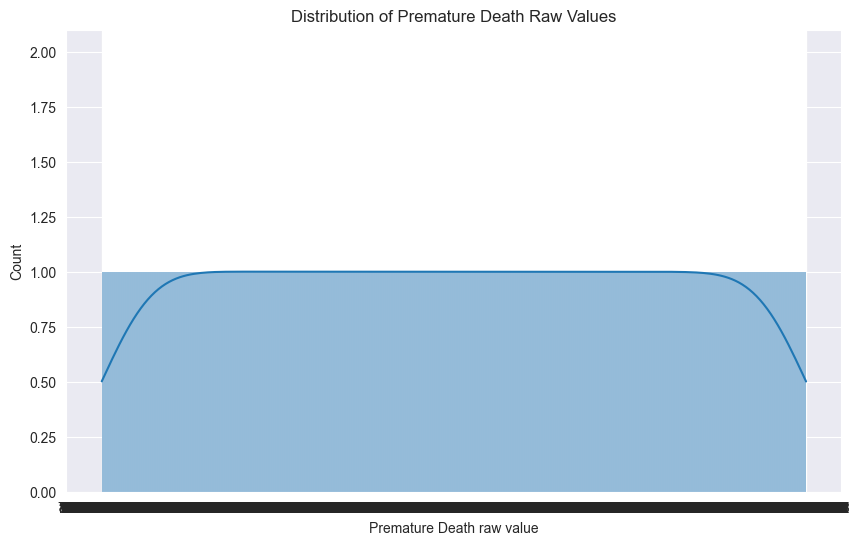

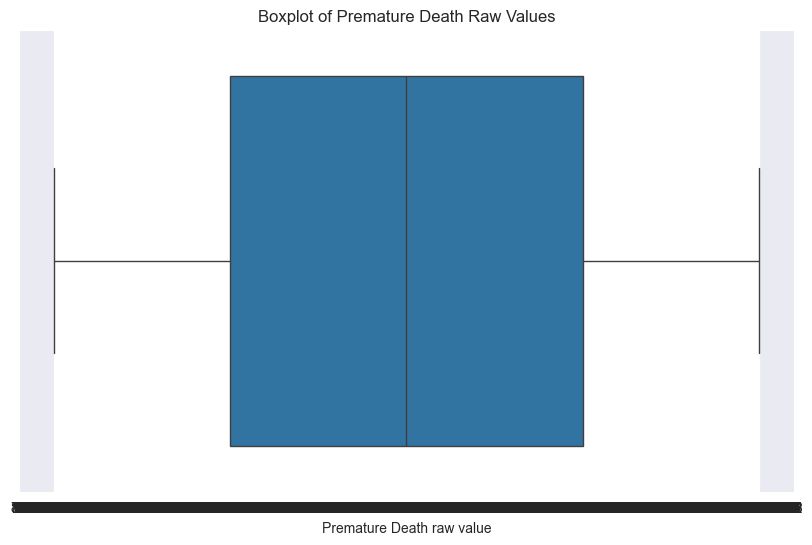

ValueError: could not convert string to float: 'US'

In [11]:
# Quick Look into the dataset

# Basic data structure
print(data.info())

# Summary statistics for numerical data
print(data.describe())

# Missing values
print(data.isnull().sum())

# Example of a histogram for a numerical column
plt.figure(figsize=(10, 6))
sns.histplot(data['Premature Death raw value'], kde=True)
plt.title('Distribution of Premature Death Raw Values')
plt.show()

# Example of a boxplot for a numerical column
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Premature Death raw value'])
plt.title('Boxplot of Premature Death Raw Values')
plt.show()

# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Example of grouped analysis by 'State Abbreviation'
grouped_data = data.groupby('State Abbreviation')['Premature Death raw value'].mean()
grouped_data.plot(kind='bar', figsize=(12, 6))
plt.title('Average Premature Death Raw Value by State')
plt.ylabel('Average Premature Death Raw Value')
plt.show()

## Focus on Obesity First

In [12]:
# Overview of relevant columns
print(data[['Name', 'Adult Obesity raw value', 'Adult Obesity CI low', 'Adult Obesity CI high']].head())
print(data[['Adult Obesity raw value', 'Adult Obesity CI low', 'Adult Obesity CI high']].describe())

             Name Adult Obesity raw value Adult Obesity CI low  \
1   United States                    0.32                  NaN   
2         Alabama                   0.393                0.374   
3  Autauga County                   0.373                0.357   
4  Baldwin County                   0.326                0.311   
5  Barbour County                   0.464                 0.45   

  Adult Obesity CI high  
1                   NaN  
2                 0.411  
3                 0.389  
4                 0.342  
5                 0.478  
       Adult Obesity raw value Adult Obesity CI low Adult Obesity CI high
count                     3192                 3191                  3191
unique                     276                  269                   284
top                      0.362                0.366                 0.383
freq                        42                   41                    45


In [18]:
# Convert columns to numeric, coercing errors which converts non-numeric values to NaN
data['Adult Obesity raw value'] = pd.to_numeric(data['Adult Obesity raw value'], errors='coerce')
data['Adult Obesity CI low'] = pd.to_numeric(data['Adult Obesity CI low'], errors='coerce')
data['Adult Obesity CI high'] = pd.to_numeric(data['Adult Obesity CI high'], errors='coerce')

# Check again for missing values after conversion
print(data[['Adult Obesity raw value', 'Adult Obesity CI low', 'Adult Obesity CI high']].isnull().sum())

# Fill missing values with the mean
data['Adult Obesity raw value'].fillna(data['Adult Obesity raw value'].mean(), inplace=True)
data['Adult Obesity CI low'].fillna(data['Adult Obesity CI low'].mean(), inplace=True)
data['Adult Obesity CI high'].fillna(data['Adult Obesity CI high'].mean(), inplace=True)


Adult Obesity raw value    2
Adult Obesity CI low       3
Adult Obesity CI high      3
dtype: int64


/var/folders/fv/lkh46jcn57d1dj9hwqd535kw0000gq/T/ipykernel_49240/609517132.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Adult Obesity raw value'].fillna(data['Adult Obesity raw value'].mean(), inplace=True)
/var/folders/fv/lkh46jcn57d1dj9hwqd535kw0000gq/T/ipykernel_49240/609517132.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediat

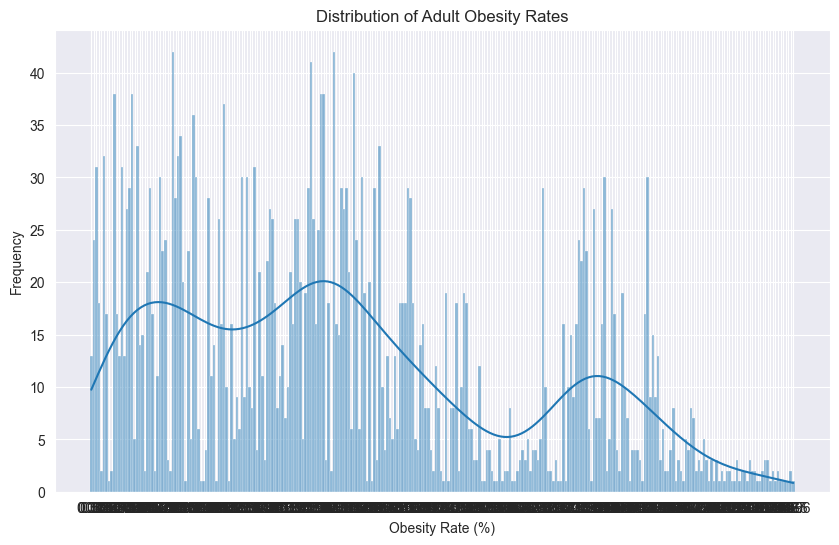

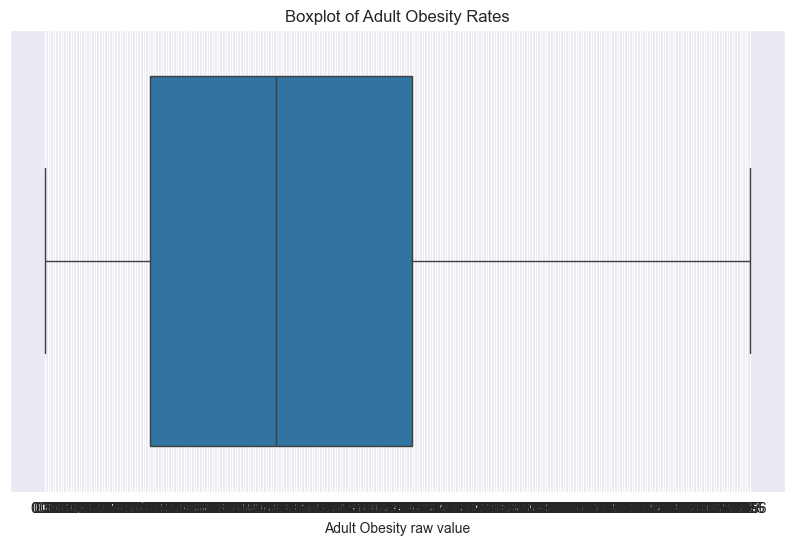

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of Adult Obesity Rates
plt.figure(figsize=(10, 6))
sns.histplot(data['Adult Obesity raw value'], kde=True)
plt.title('Distribution of Adult Obesity Rates')
plt.xlabel('Obesity Rate (%)')
plt.ylabel('Frequency')
plt.show()

# Boxplot to visualize the spread and outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Adult Obesity raw value'])
plt.title('Boxplot of Adult Obesity Rates')
plt.show()


                     Name Adult Obesity raw value
1469       Leflore County                   0.532
1453        Holmes County                   0.532
68          Wilcox County                   0.513
1151  East Carroll Parish                   0.512
55           Perry County                   0.509
1454     Humphreys County                   0.499
34          Greene County                   0.491
2066       Rolette County                   0.491
1499        Tunica County                   0.491
53      Montgomery County                    0.49


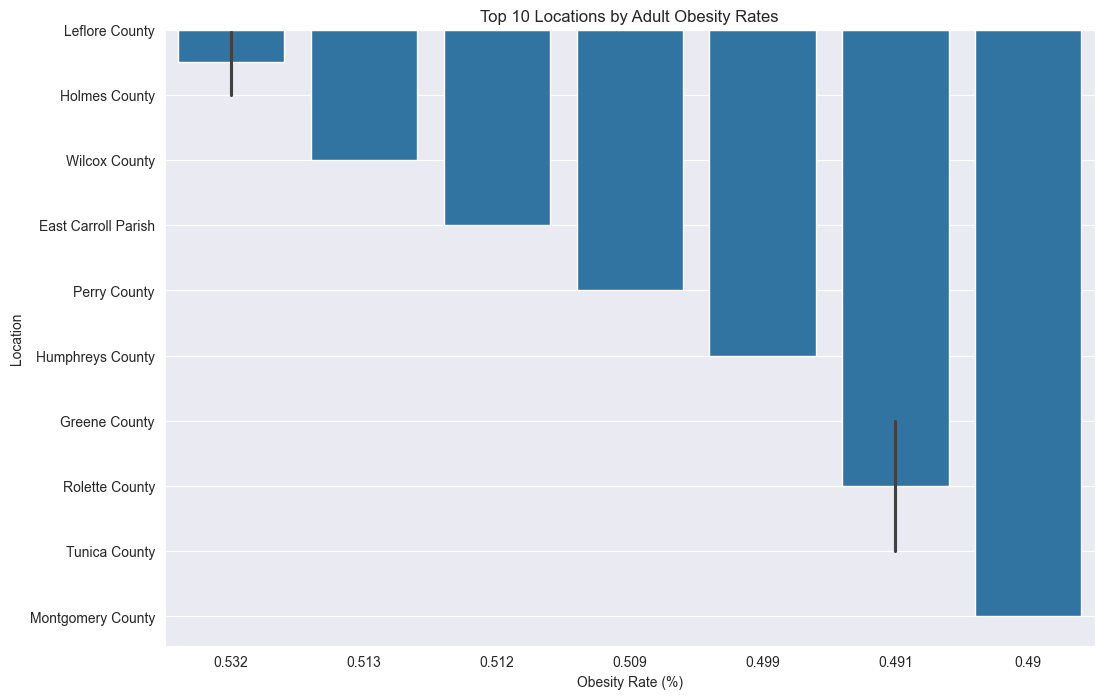

In [15]:
# Top 10 counties with the highest obesity rates
top_obesity = data[['Name', 'Adult Obesity raw value']].sort_values(by='Adult Obesity raw value', ascending=False).head(10)
print(top_obesity)

# Plotting top counties
plt.figure(figsize=(12, 8))
sns.barplot(x='Adult Obesity raw value', y='Name', data=top_obesity)
plt.title('Top 10 Locations by Adult Obesity Rates')
plt.xlabel('Obesity Rate (%)')
plt.ylabel('Location')
plt.show()

ValueError: 'yerr' must not contain negative values

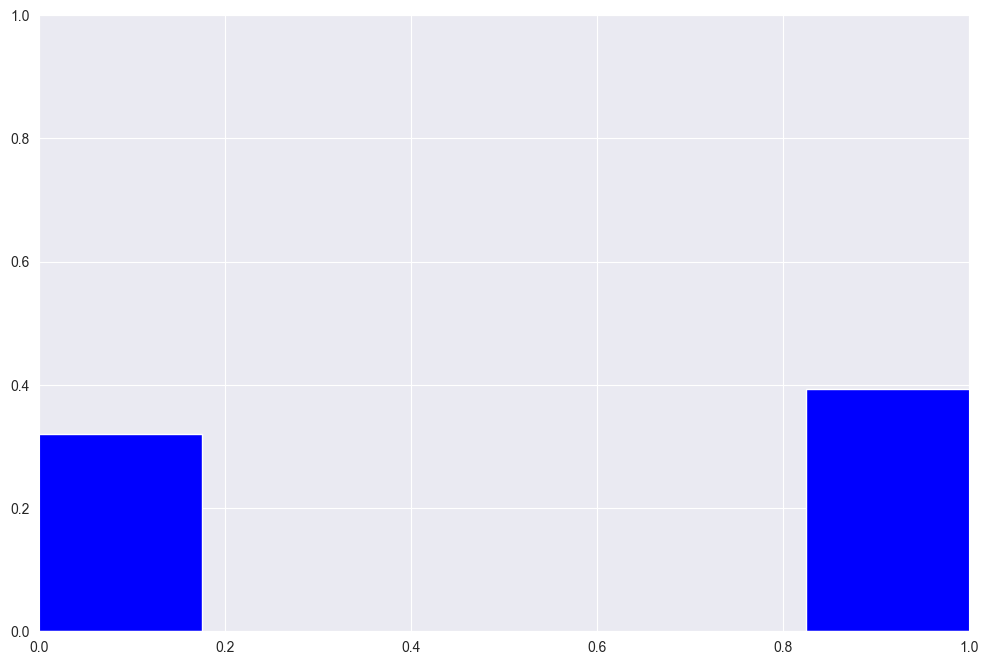

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already ensured that the data is correctly typed as numeric
data_subset = data.head(10)  # Let's work with a smaller subset for clarity
names = data_subset['Name']
values = data_subset['Adult Obesity raw value']
ci_low = data_subset['Adult Obesity CI low']
ci_high = data_subset['Adult Obesity CI high']

# Calculate error bars as absolute differences
errors_lower = values - ci_low  # Should be positive if ci_low is less than values
errors_upper = ci_high - values  # Should be positive if ci_high is greater than values

errors = [errors_lower, errors_upper]  # This specifies [lower_error, upper_error]

fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35  # Width of the bars
indices = np.arange(len(values))  # the label locations

errors_lower = np.abs(values - ci_low)
errors_upper = np.abs(ci_high - values)

# Create bars with error bars
ax.bar(indices, values, yerr=errors, capsize=5, color='b', width=bar_width, label='Adult Obesity')

# Labeling
ax.set_xlabel('Location')
ax.set_ylabel('Obesity Rate (%)')
ax.set_title('Adult Obesity Rates with Confidence Intervals')
ax.set_xticks(indices)
ax.set_xticklabels(names, rotation=90)  # Rotate names for better visibility

plt.legend()
plt.tight_layout()
plt.show()


In [24]:
print(data_subset[['Adult Obesity raw value', 'Adult Obesity CI low', 'Adult Obesity CI high']])
errors_lower = np.abs(values - ci_low)
errors_upper = np.abs(ci_high - values)
print(errors_lower)
print(errors_upper)

    Adult Obesity raw value  Adult Obesity CI low  Adult Obesity CI high
1                     0.320              0.345104               0.377394
2                     0.393              0.374000               0.411000
3                     0.373              0.357000               0.389000
4                     0.326              0.311000               0.342000
5                     0.464              0.450000               0.478000
6                     0.384              0.368000               0.399000
7                     0.327              0.312000               0.344000
8                     0.483              0.468000               0.499000
9                     0.454              0.440000               0.469000
10                    0.374              0.359000               0.388000
1     0.025104
2     0.019000
3     0.016000
4     0.015000
5     0.014000
6     0.016000
7     0.015000
8     0.015000
9     0.014000
10    0.015000
dtype: float64
1     0.057394
2     0.018000
3 

### Now we want to look into other years

In [28]:
# Load the dataset
DATA_PATH = os.getcwd()
dataset_name = "analytic_data2022.csv"
FULL_PATH = os.path.join(DATA_PATH, 'data', "CHR Analytic Datasets", dataset_name)
data = pd.read_csv(FULL_PATH, low_memory=False)
data_2022 = data[1:]
data_2022.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,...,% female raw value,% female numerator,% female denominator,% female CI low,% female CI high,% rural raw value,% rural numerator,% rural denominator,% rural CI low,% rural CI high
1,00,000,00000,US,United States,2022,NaN,7281.9355638,4125218,917267406,...,0.5075447019,167227921,329484123,NaN,NaN,0.1926902892,NaN,NaN,NaN,NaN
2,01,000,01000,AL,Alabama,2022,NaN,10350.071456,88086,13668498,...,0.5170272184,2544566,4921532,NaN,NaN,0.409631829,1957932,4779736,NaN,NaN
3,01,001,01001,AL,Autauga County,2022,1,8027.3947267,836,156081,...,0.5150770327,28919,56145,NaN,NaN,0.4200216232,22921,54571,NaN,NaN
4,01,003,01003,AL,Baldwin County,2022,1,8118.3582061,3377,614143,...,0.5158905651,118287,229287,NaN,NaN,0.4227909911,77060,182265,NaN,NaN
5,01,005,01005,AL,Barbour County,2022,1,12876.760319,539,68126,...,0.4718370003,11602,24589,NaN,NaN,0.677896347,18613,27457,NaN,NaN


In [29]:
# Overview of relevant columns
data = data_2022

print(data[['Name', 'Adult Obesity raw value', 'Adult Obesity CI low', 'Adult Obesity CI high']].head())
print(data[['Adult Obesity raw value', 'Adult Obesity CI low', 'Adult Obesity CI high']].describe())
## Not here??

KeyError: "['Adult Obesity raw value', 'Adult Obesity CI low', 'Adult Obesity CI high'] not in index"

### Looking into other factors

### EDA First 

In [35]:
data.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature Death raw value,Premature Death numerator,Premature Death denominator,...,% Female raw value,% Female numerator,% Female denominator,% Female CI low,% Female CI high,% Rural raw value,% Rural numerator,% Rural denominator,% Rural CI low,% Rural CI high
1,00,000,00000,US,United States,2023,NaN,7281.9355638,4125218,917267406,...,0.5047067187,167509003,331893745,NaN,NaN,0.193,NaN,NaN,NaN,NaN
2,01,000,01000,AL,Alabama,2023,NaN,10350.071456,88086,13668498,...,0.5142542169,2591778,5039877,NaN,NaN,0.409631829,1957932,4779736,NaN,NaN
3,01,001,01001,AL,Autauga County,2023,1,8027.3947267,836,156081,...,0.513782892,30362,59095,NaN,NaN,0.4200216232,22921,54571,NaN,NaN
4,01,003,01003,AL,Baldwin County,2023,1,8118.3582061,3377,614143,...,0.5134771453,122872,239294,NaN,NaN,0.4227909911,77060,182265,NaN,NaN
5,01,005,01005,AL,Barbour County,2023,1,12876.760319,539,68126,...,0.4670325268,11659,24964,NaN,NaN,0.677896347,18613,27457,NaN,NaN


In [36]:
data['Physical Inactivity raw value']

1        0.22
2       0.278
3       0.264
4       0.232
5       0.357
        ...  
3190    0.236
3191     0.16
3192    0.234
3193    0.227
3194    0.253
Name: Physical Inactivity raw value, Length: 3194, dtype: object

In [4]:
columns = ['Adult Obesity raw value', 'Physical Inactivity raw value', 'Diabetes Prevalence raw value', '% Non-Hispanic Black raw value', '% 65 and Older raw value', 'Food Insecurity raw value', 'Severe Housing Problem raw value', 'Uninsured raw value']
import_data = data[columns]

In [5]:
# Display basic information and statistics
print(import_data.describe())
print(import_data.info())
print(import_data.isnull().sum())

       Adult Obesity raw value Physical Inactivity raw value  \
count                     3192                          3192   
unique                     276                           274   
top                      0.362                         0.219   
freq                        42                            39   

       Diabetes Prevalence raw value % Non-Hispanic Black raw value  \
count                           3192                           3194   
unique                           132                           3177   
top                            0.094                              0   
freq                              79                              7   

       % 65 and Older raw value Food Insecurity raw value  \
count                      3194                      3194   
unique                     3193                       212   
top                0.1281068577                     0.111   
freq                          2                        42   

       Severe Hou

In [6]:
# Simple imputation with the median (you can choose mean or another method if more appropriate)
import_data.dropna()

,Adult Obesity raw value,Physical Inactivity raw value,Diabetes Prevalence raw value,% Non-Hispanic Black raw value,% 65 and Older raw value,Food Insecurity raw value,Severe Housing Problems raw value,Uninsured raw value
1,0.32,0.22,0.09,0.1261202919,0.1682705801,0.118,0.1696721824,0.1044496729
2,0.393,0.278,0.13,0.2651199623,0.1763568833,0.145,0.1315678879,0.1182271569
3,0.373,0.264,0.106,0.2073102631,0.1604873509,0.145,0.1444262678,0.1055942098
4,0.326,0.232,0.097,0.0836794905,0.2146982373,0.124,0.1223897195,0.1087488083
5,0.464,0.357,0.156,0.473962506,0.1997676654,0.195,0.1621187801,0.1436827544
...,...,...,...,...,...,...,...,...
3190,0.33,0.236,0.079,0.0106454559,0.1414427837,0.115,0.1037037037,0.138044258
3191,0.199,0.16,0.063,0.0072534464,0.1689925769,0.091,0.1541019956,0.1450761574
3192,0.346,0.234,0.078,0.0051853647,0.1589532348,0.111,0.0868992758,0.1389284021
3193,0.301,0.227,0.08,0.004412719,0.2317975341,0.106,0.072808321,0.158872077


In [7]:
# Looking Into It Again
# Display basic information and statistics
print(import_data.describe())
print(import_data.info())
print(import_data.isnull().sum())

       Adult Obesity raw value Physical Inactivity raw value  \
count                     3192                          3192   
unique                     276                           274   
top                      0.362                         0.219   
freq                        42                            39   

       Diabetes Prevalence raw value % Non-Hispanic Black raw value  \
count                           3192                           3194   
unique                           132                           3177   
top                            0.094                              0   
freq                              79                              7   

       % 65 and Older raw value Food Insecurity raw value  \
count                      3194                      3194   
unique                     3193                       212   
top                0.1281068577                     0.111   
freq                          2                        42   

       Severe Hou

In [12]:
import_data['% 65 and Older raw value'].count

<bound method Series.count of 1       0.1682705801
2       0.1763568833
3       0.1604873509
4       0.2146982373
5       0.1997676654
            ...     
3190    0.1414427837
3191    0.1689925769
3192    0.1589532348
3193    0.2317975341
3194    0.2257968866
Name: % 65 and Older raw value, Length: 3194, dtype: object>

### Visualizing 

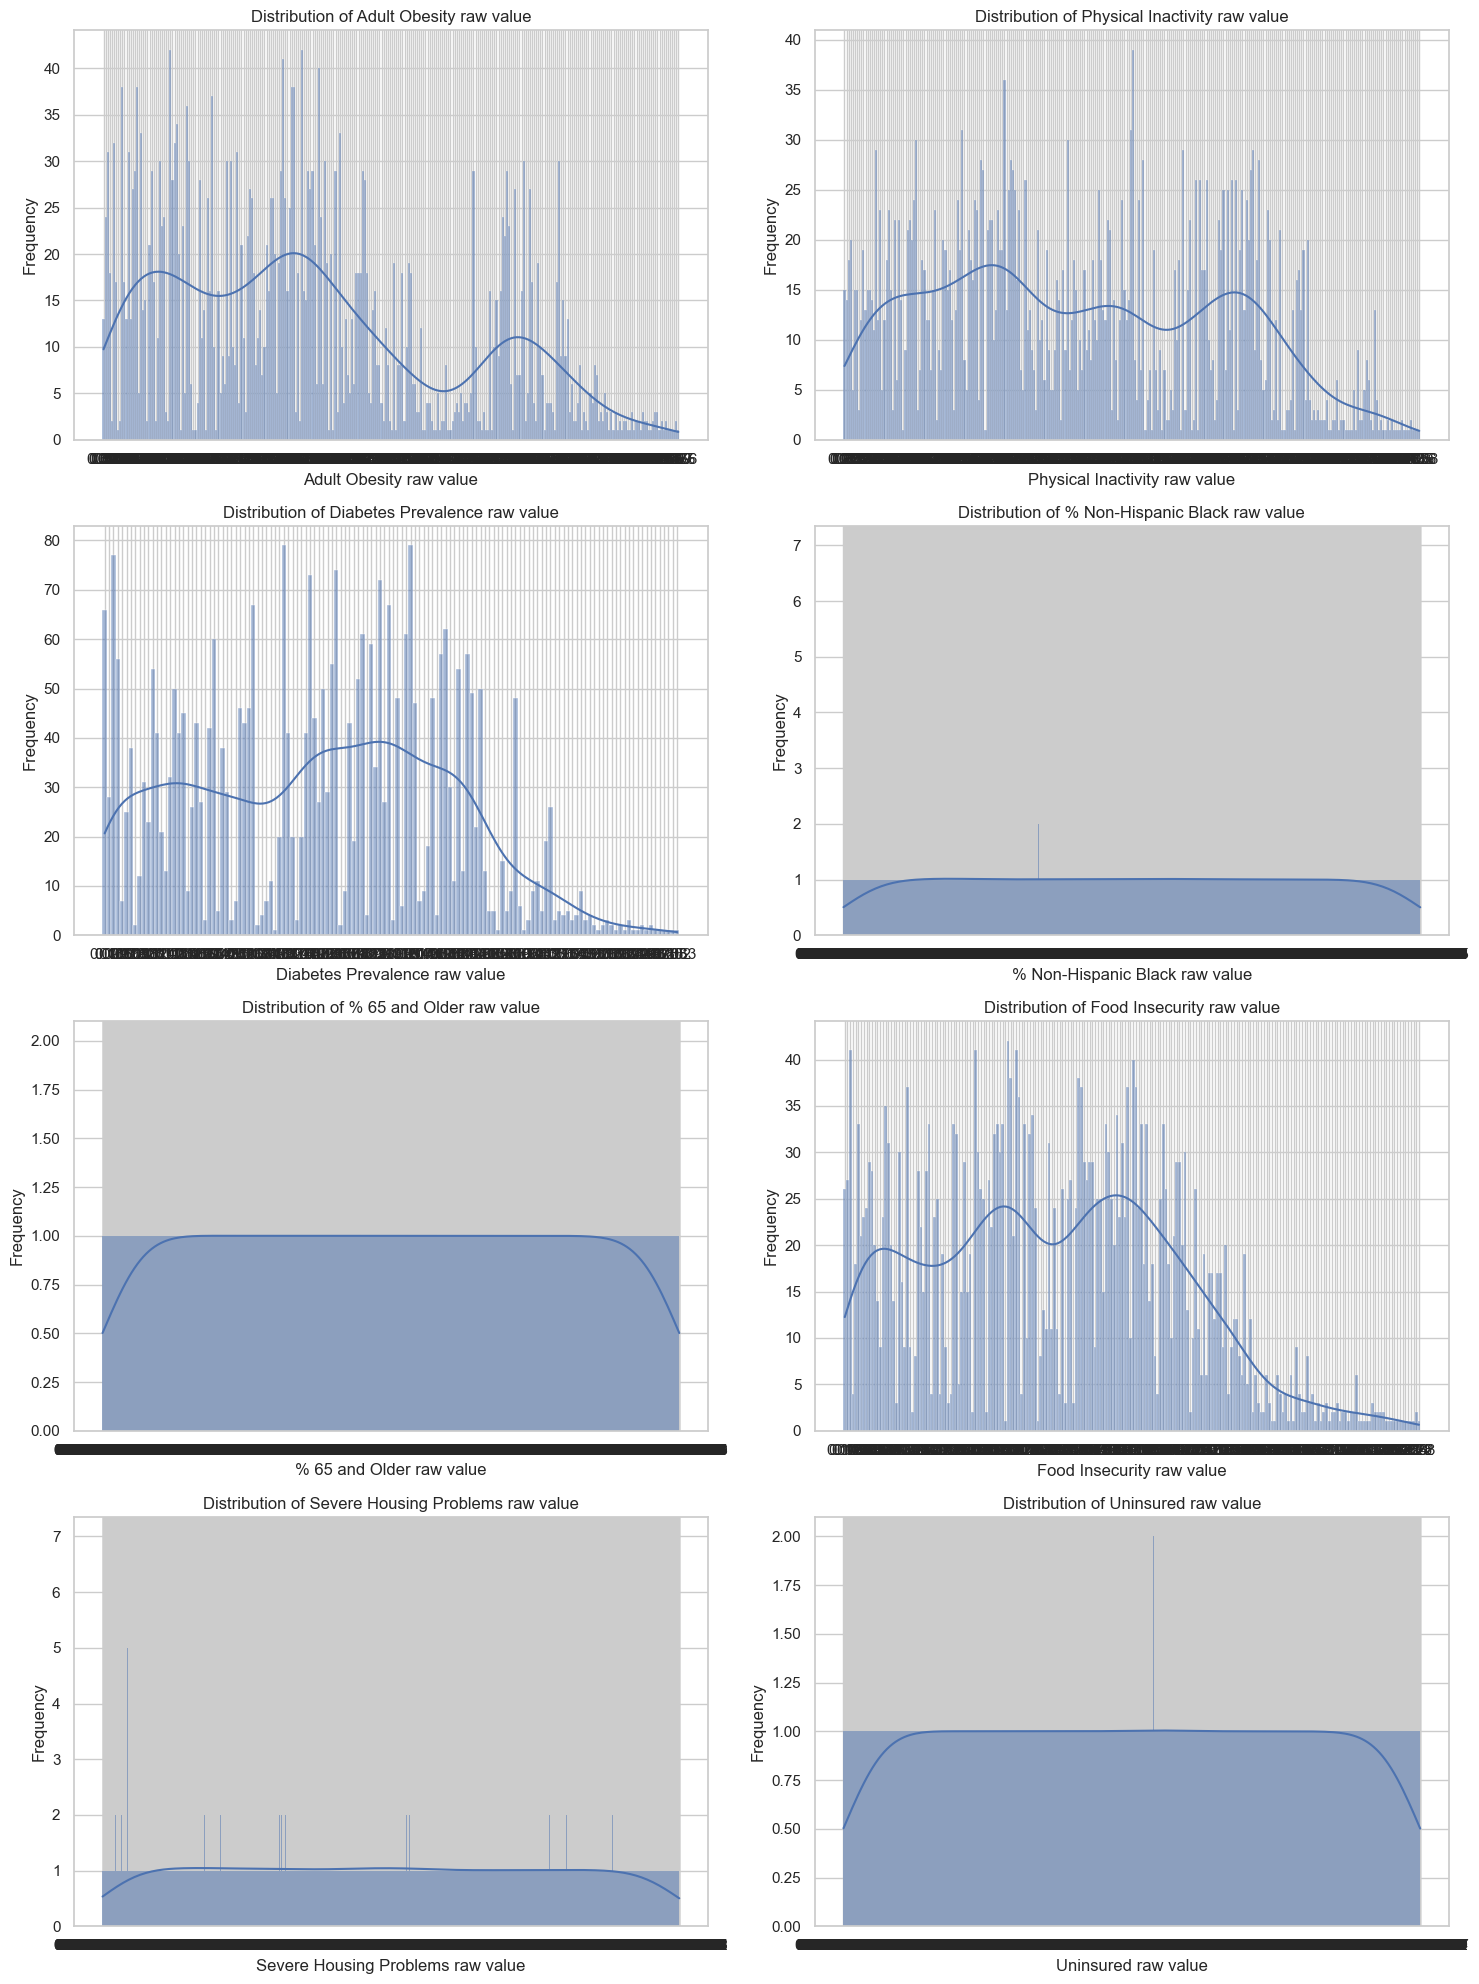

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting up the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting distributions of each variable
fig, axs = plt.subplots(4, 2, figsize=(15, 20))
axs = axs.flatten()
for i, col in enumerate(import_data.columns):
    sns.histplot(import_data[col], kde=True, ax=axs[i])
    axs[i].set_title(f'Distribution of {col}')
    axs[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

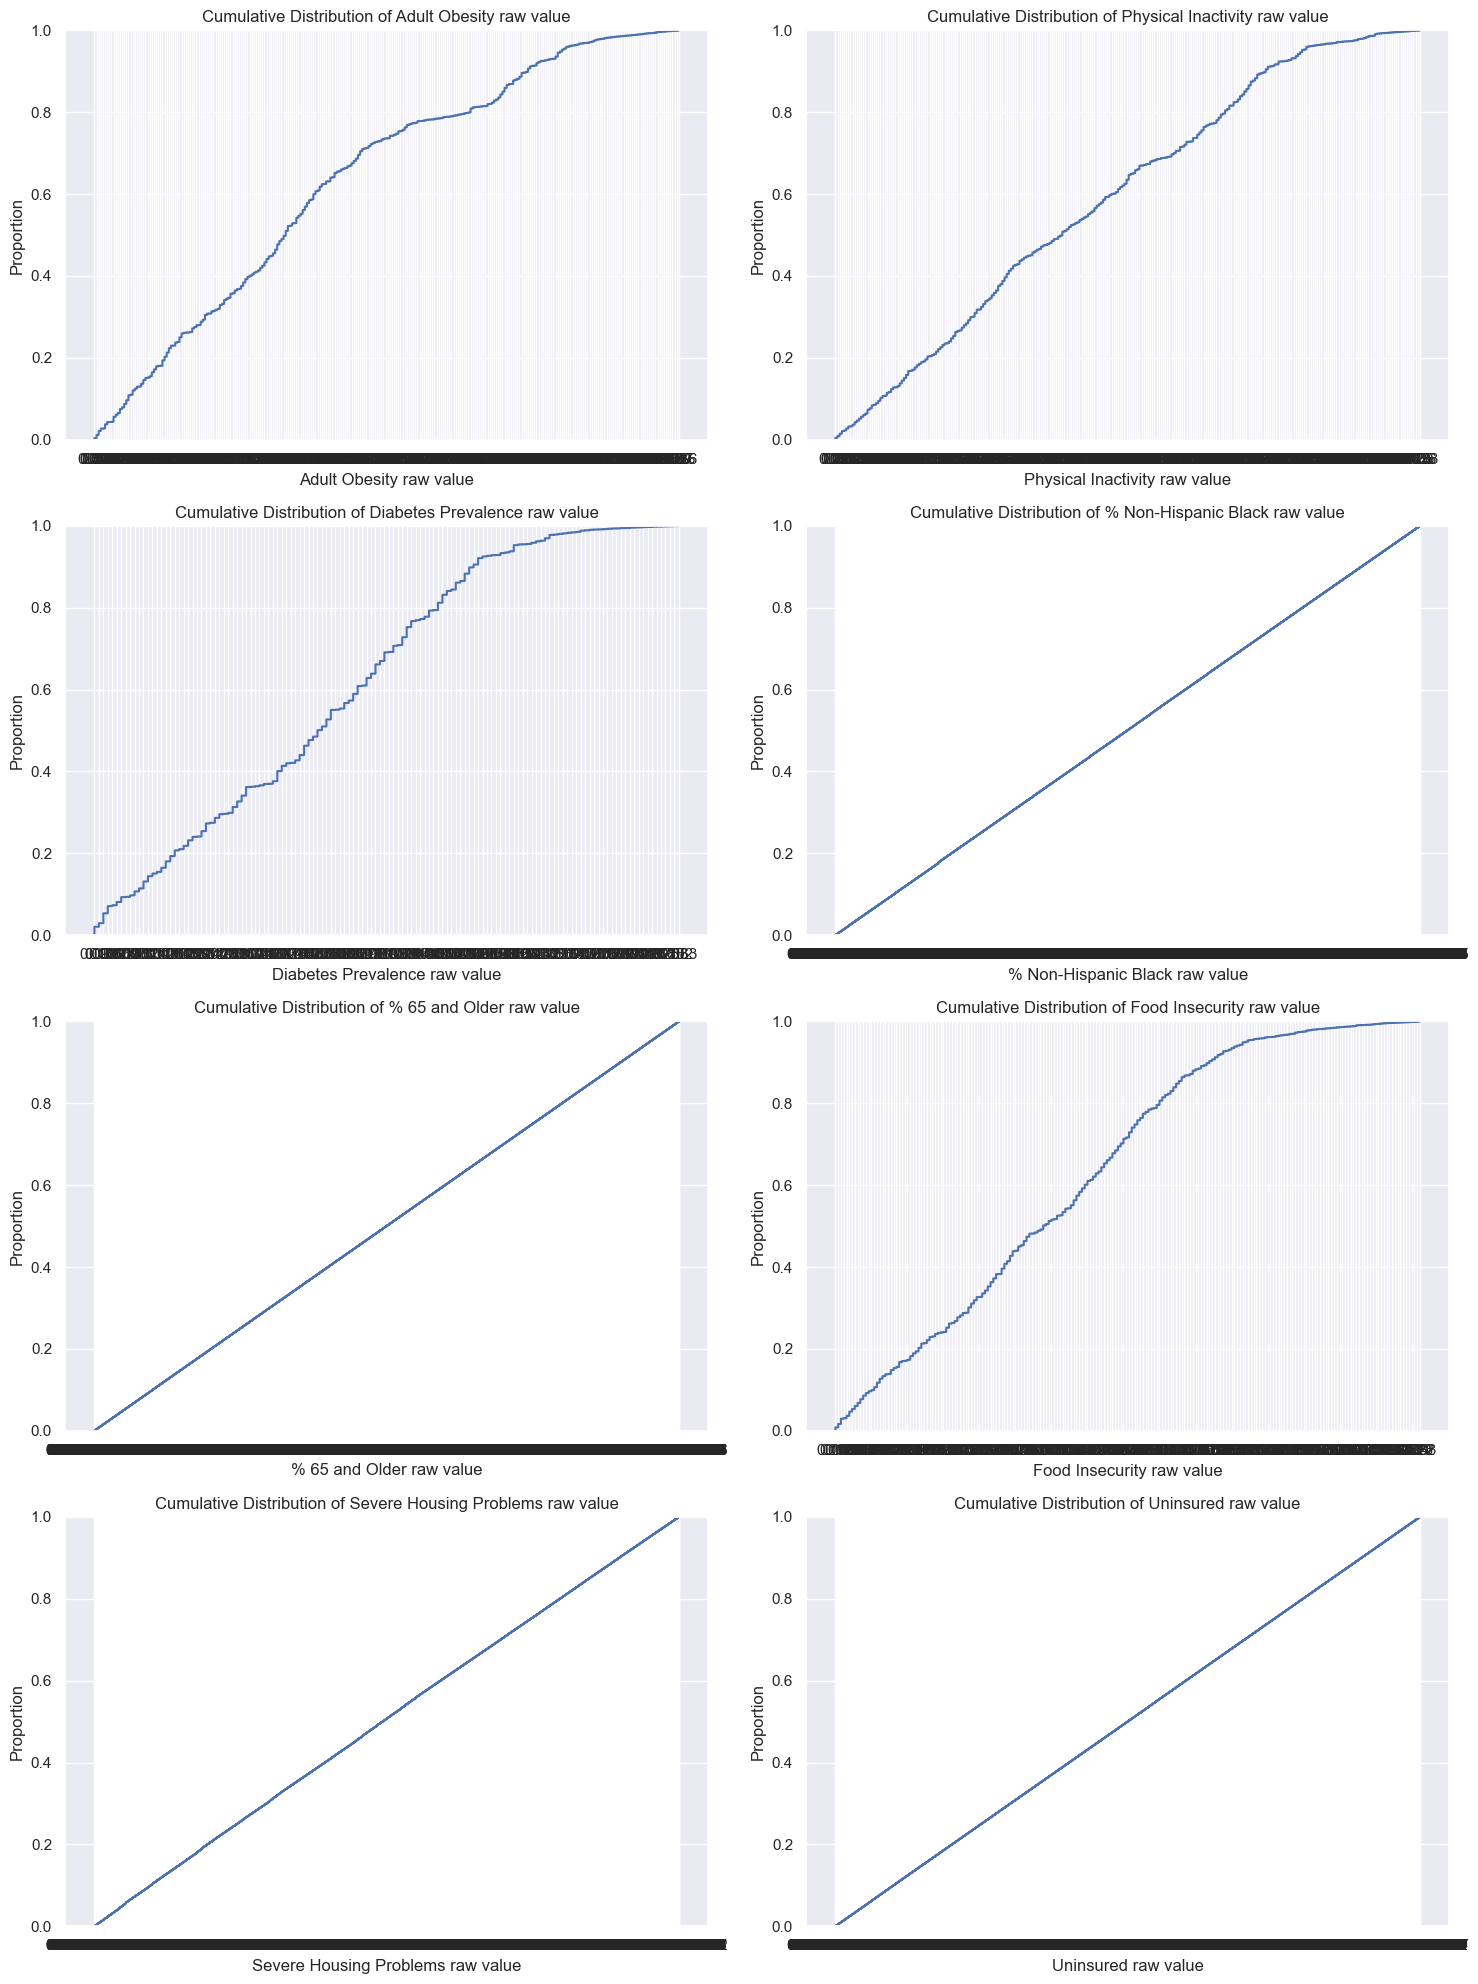

In [60]:
fig, axs = plt.subplots(4, 2, figsize=(15, 20))
axs = axs.flatten()
for i, col in enumerate(import_data.columns):
    sns.ecdfplot(data=import_data[col], ax=axs[i])
    axs[i].set_title(f'Cumulative Distribution of {col}')
plt.tight_layout()
plt.show()

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

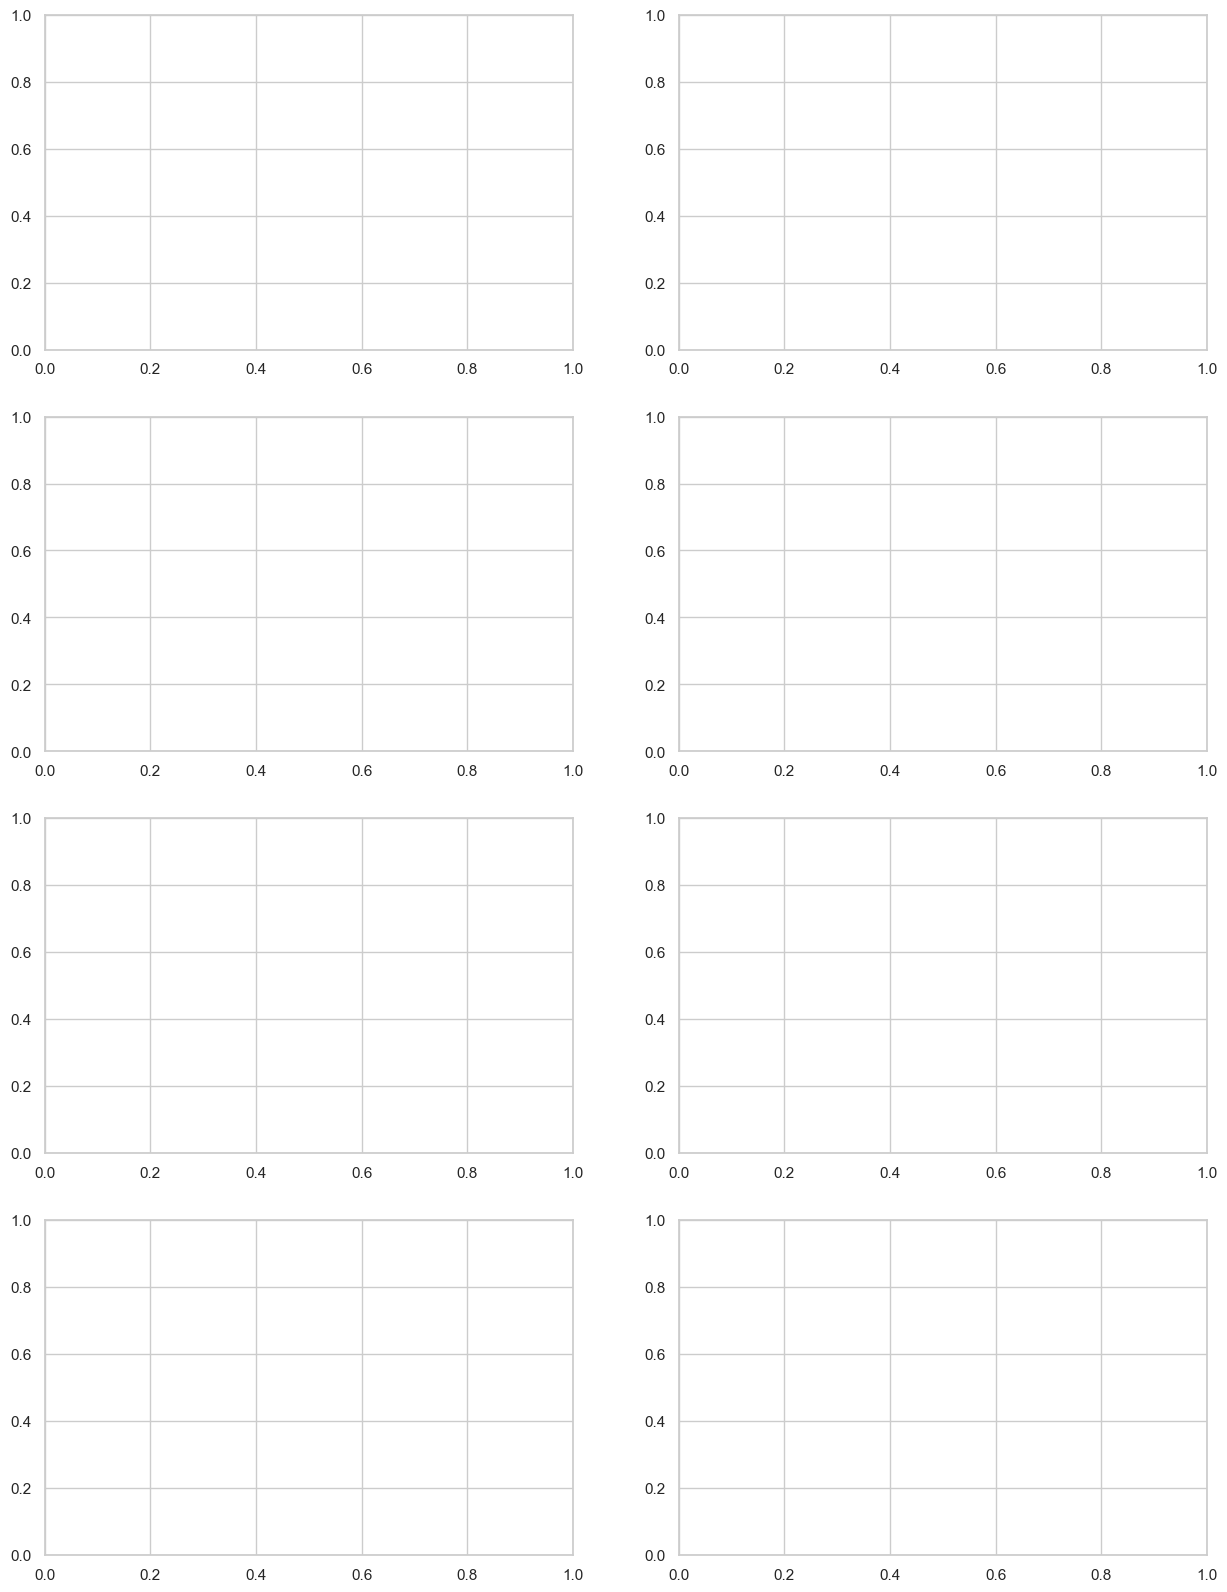

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting density plots for each variable
fig, axs = plt.subplots(4, 2, figsize=(15, 20))
axs = axs.flatten()
for i, col in enumerate(import_data.columns):
    sns.kdeplot(data=import_data[col], ax=axs[i], fill=True)
    axs[i].set_title(f'Density Plot of {col}')
plt.tight_layout()
plt.show()

### Examining Correlations Between Different Variables

In [48]:
# Pairplot for a subset (can be computationally intensive with large data and many variables)
sns.pairplot(import_data.sample(500))  # using a sample for efficiency
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = import_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

ValueError: No variables found for grid columns.

### Building the Random Forest Model

In [40]:
# New Imports 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

In [54]:
# Select the columns relevant to the model
data = import_data

In [55]:
# Check for and handle missing values
imputer = SimpleImputer(strategy='mean')
data = pd.DataFrame(imputer.fit_transform(data), columns=columns)

# Verify the data
print(data.head())
print(data.isnull().sum())  # Should show zero for all columns after imputation

   Adult Obesity raw value  Physical Inactivity raw value  \
0                    0.320                          0.220   
1                    0.393                          0.278   
2                    0.373                          0.264   
3                    0.326                          0.232   
4                    0.464                          0.357   

   Diabetes Prevalence raw value  % Non-Hispanic Black raw value  \
0                          0.090                        0.126120   
1                          0.130                        0.265120   
2                          0.106                        0.207310   
3                          0.097                        0.083679   
4                          0.156                        0.473963   

   % 65 and Older raw value  Food Insecurity raw value  \
0                  0.168271                      0.118   
1                  0.176357                      0.145   
2                  0.160487                      0

In [56]:
# Splitting The Dataset
# Define the target variable and predictors
X = data.drop('Adult Obesity raw value', axis=1)
y = data['Adult Obesity raw value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
#Building the Model
# Initialize the Random Forest model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [58]:
#Evaluating 
# Predict on the test set
y_pred = random_forest.predict(X_test)

# Calculate the mean squared error of the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.0005313942833062185


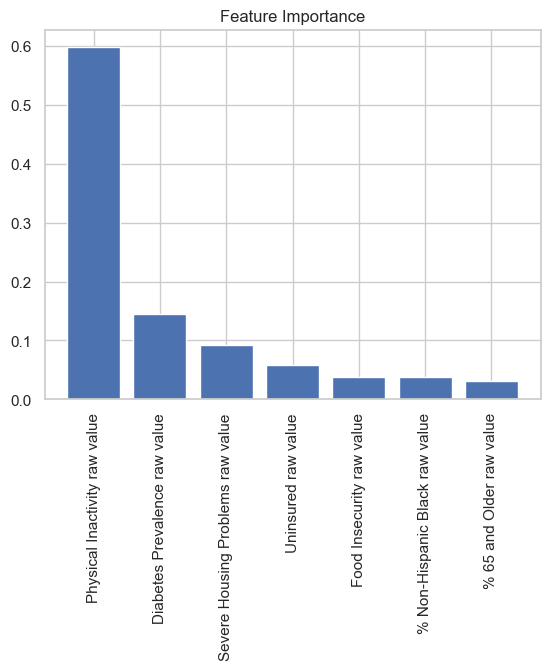

In [59]:
#Feature Importance
# Get feature importance
importances = random_forest.feature_importances_
features = X.columns

# Sort the feature importance in descending order
sorted_indices = np.argsort(importances)[::-1]

# Visualize the feature importances
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), features[sorted_indices], rotation=90)
plt.show()

In [61]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Predictions
y_pred = random_forest.predict(X_test)

# Regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 0.0005313942833062185
Mean Absolute Error (MAE): 0.0172155690183989
R-squared: 0.7642803162161698
